<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8
## Nombre: Andrés López Echeverri
## CC: 1007315751

In [11]:
#Librerias

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons




# Laboratorio
1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [12]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import time 


### 1 Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

In [13]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

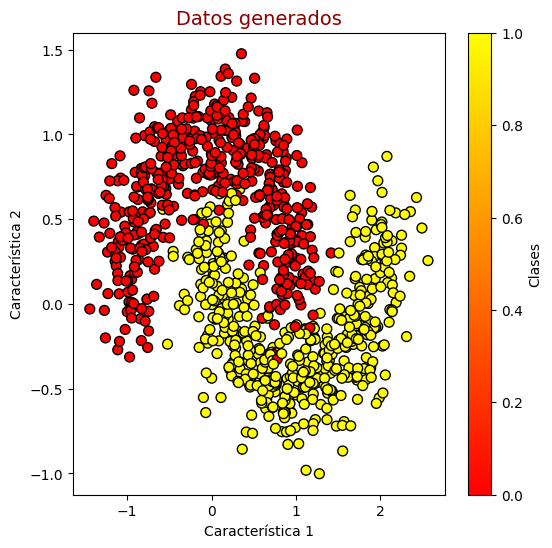

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50, edgecolor='k')
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Datos generados",color='darkred',size=14)
plt.colorbar(label="Clases")
plt.show()



In [15]:
# Estandarización de las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
#Separación de los test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [18]:
# Creación del modelo
def build_model(activation='sigmoid', loss='binary_crossentropy'):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(4, input_dim=X.shape[1], activation='relu'))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(1, activation=activation))
    opt = keras.optimizers.SGD(learning_rate=0.01)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model

In [19]:
# Entrenamiento del modelo
time_start = time.time()
keras.backend.clear_session()
model = build_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)


time_end = time.time()


Epoch 1/1000


/home/andres/Universidad/tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-12 20:46:27.580323: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6447 - loss: 0.7741 - val_accuracy: 0.7150 - val_loss: 0.7032
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.7241 - val_accuracy: 0.7350 - val_loss: 0.6599
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.6744 - val_accuracy: 0.7500 - val_loss: 0.6285
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7346 - loss: 0.6213 - val_accuracy: 0.7500 - val_loss: 0.6037
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.6134 - val_accuracy: 0.7650 - val_loss: 0.5826
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5831 - val_accuracy: 0.7700 - val_loss: 0.5639
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.5667 - val_accuracy: 0.7700 - val_loss: 0.5474
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.5455 - val_accuracy: 0.8000 - val_l

In [20]:
print(f'Tiempo total de entrenamiento: {time_end - time_start:.2f} segundos')
print(f'Tiempo total de entrenamiento: {(time_end - time_start) / 60:.2f} minutos')

Tiempo total de entrenamiento: 103.96 segundos
Tiempo total de entrenamiento: 1.73 minutos


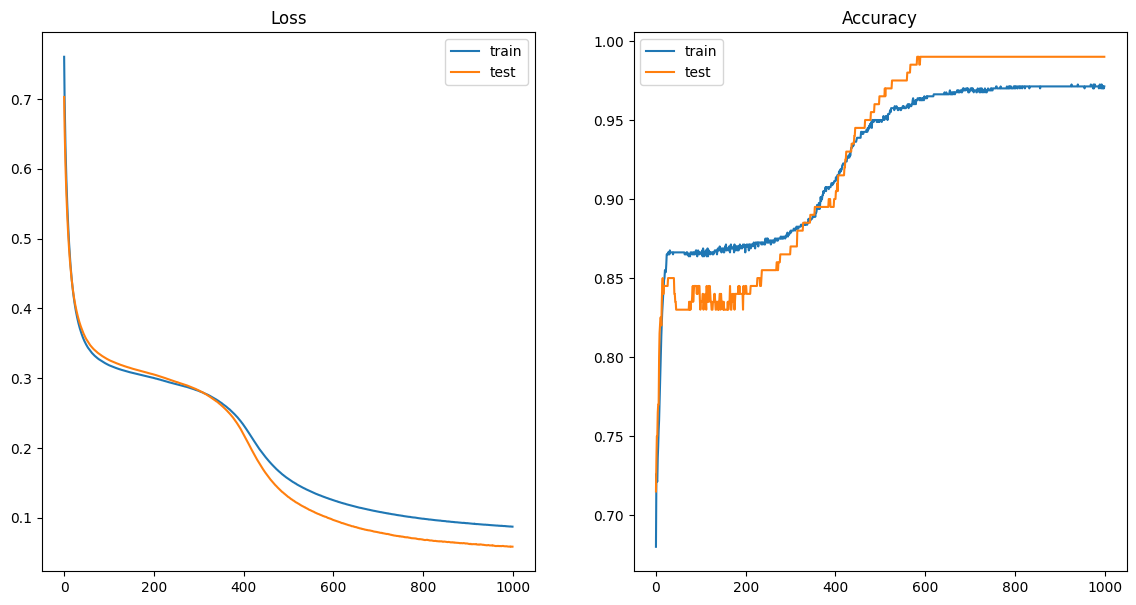

Train: 0.971, Test: 0.990


In [21]:
#Gráficas de pérdidas y precisión
plt.figure(figsize=(14, 7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de la precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

El train y el test con el modelo usado tienen un 0.971 y 0.975 de accuracy respectivamente

### 2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [22]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

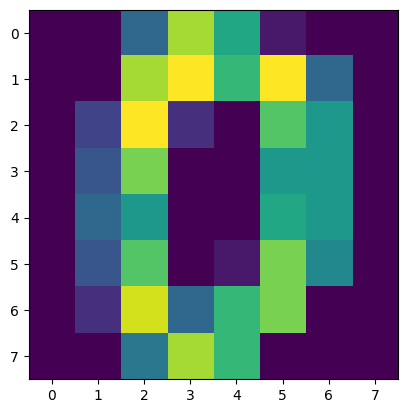

In [23]:
plt.imshow(X[0].reshape(8, 8))


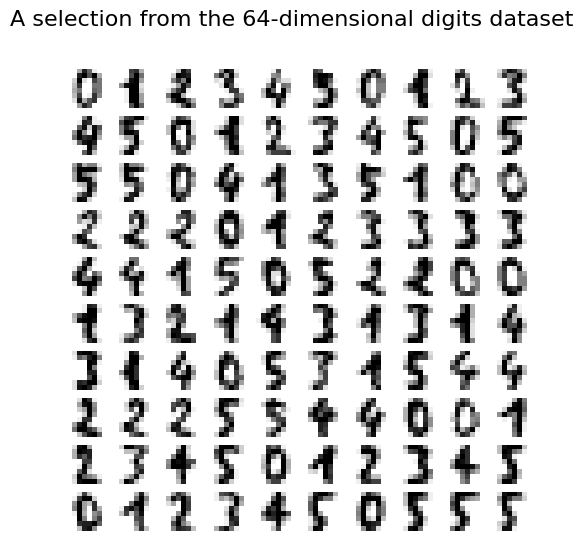

In [24]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Creación del modelo
def build_model_digits(activation='softmax', loss='categorical_crossentropy'):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_dim=n_features))
    model.add(keras.layers.Dense(32, activation='relu'))
    
    model.add(keras.layers.Dense(6, activation=activation))  # 6 clases para los dígitos
    opt = keras.optimizers.Adam(learning_rate=0.0003)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model


In [26]:
# Convertir las etiquetas a one-hot encoded
y_train = keras.utils.to_categorical(y_train, num_classes=6)
y_test = keras.utils.to_categorical(y_test, num_classes=6)

# Entrenamiento del modelo
time_start = time.time()
keras.backend.clear_session()
model = build_model_digits()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0) 
time_end = time.time()


Epoch 1/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3051 - loss: 5.2977 - val_accuracy: 0.4885 - val_loss: 2.9728
Epoch 2/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5155 - loss: 2.4186 - val_accuracy: 0.6221 - val_loss: 1.3184
Epoch 3/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 1.0711 - val_accuracy: 0.7972 - val_loss: 0.6826
Epoch 4/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7841 - loss: 0.6626 - val_accuracy: 0.8664 - val_loss: 0.4651
Epoch 5/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8799 - loss: 0.4280 - val_accuracy: 0.8940 - val_loss: 0.3462
Epoch 6/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9118 - loss: 0.3070 - val_accuracy: 0.9171 - val_loss: 0.2703
Epoch 7/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9138 - loss: 0.2588 - val_accuracy: 0.9309 - val_loss: 0.2182
Epoch 8/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9381 - loss: 0.2043 - val_accuracy: 0.

In [27]:
print(f'Tiempo total de entrenamiento: {time_end - time_start:.2f} segundos')
print(f'Tiempo total de entrenamiento: {(time_end - time_start) / 60:.2f} minutos')


Tiempo total de entrenamiento: 131.11 segundos
Tiempo total de entrenamiento: 2.19 minutos


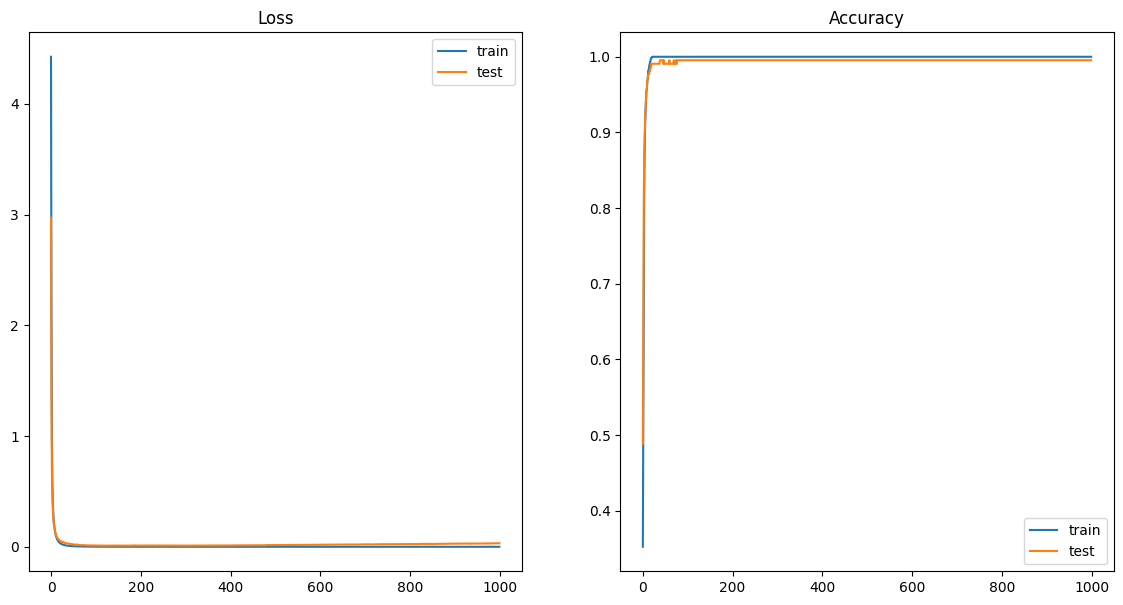

Train: 1.000, Test: 0.995


In [28]:
#graficación de pérdidas y precisión
plt.figure(figsize=(14, 7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de la precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Se observa que el modelo funciona bastante bien, el accuracy es bastante alto